In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from scipy.integrate import odeint
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [55]:
x0=np.array([-0.51, -0.52, -0.52, -0.51, -0.53])
y0=np.array([0.88, 0.91, 0.92, 0.88, 0.92])
u0=np.array([0.026, 0.65, 0.078, -0.025, 0.078])
v0=np.array([0.015, 0.037, 0.043, -0.015, 0.043])

inputs = np.array([x0, y0, u0 , v0]).T
dt = np.arange(0,1000,.01)

mj = 1.9E27
ms = 2E30

mu1 = ms / (ms + mj)
mu2 = mj / (ms + mj)

b = (1-mu1)*(1-mu2)/(mu1*mu2)
a = b*(1-mu1)/mu1

In [29]:
def DEs(I, dt):
    x,y,u,v = I
    
    r1=np.sqrt((x + mu2) ** 2 + y ** 2)
    r2=np.sqrt((x - mu1) ** 2 + y ** 2)
    
    du = 2*v + x - (mu1*(x + mu2)/r1** 3 + mu2*(x-mu1)/r2** 3)
    dv = -2*u + y - (mu1/r1** 3 + mu2/r2** 3)*y
    
    return [u, v, du, dv]

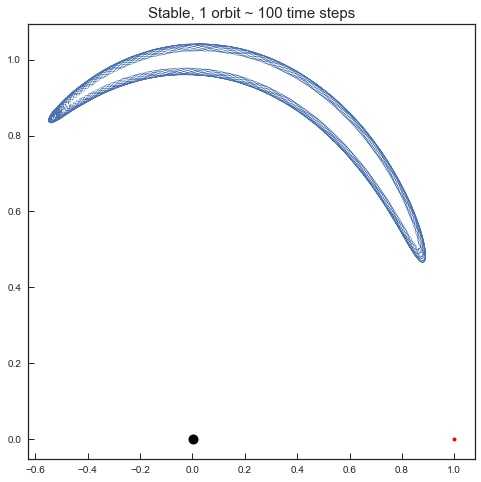

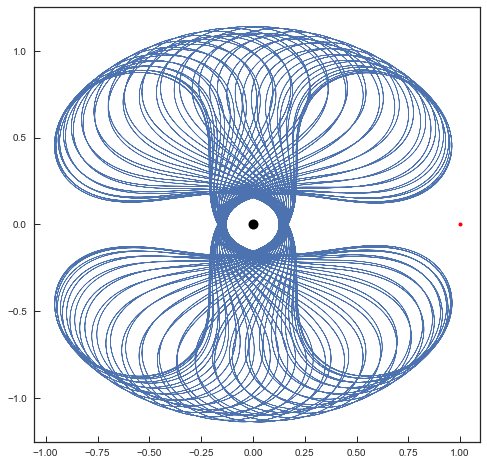

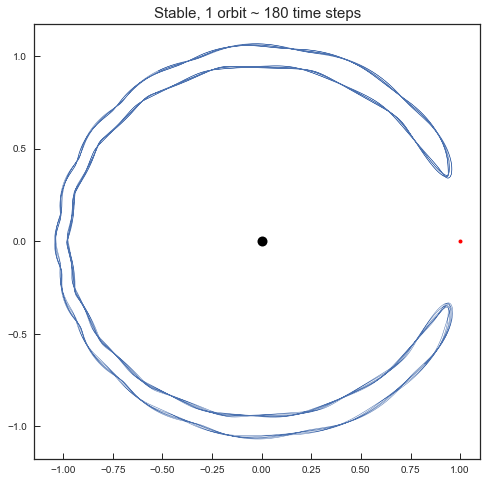

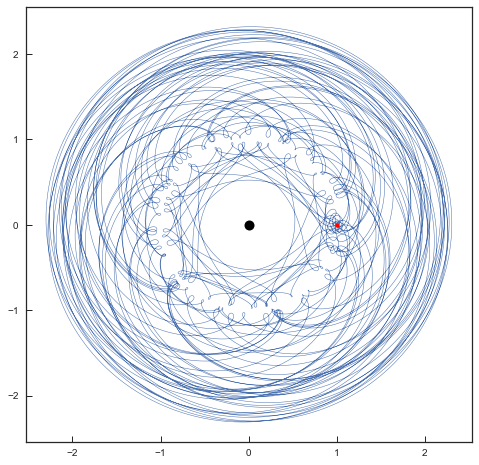

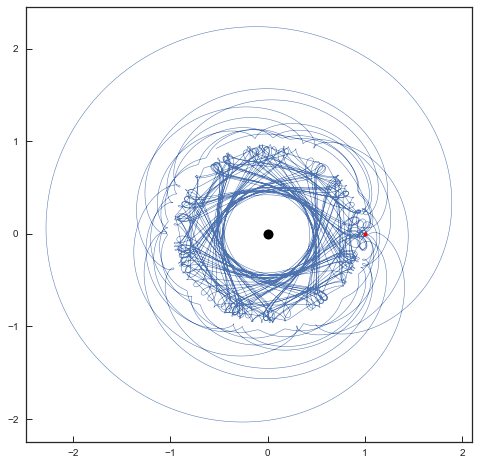

In [58]:
%matplotlib inline

for i in inputs:
    output = odeint(DEs, i, dt)
    x, y, x2, y2 = output.T

    plt.figure(figsize=[8,8])
    plt.plot(x, y, linewidth=.5)
    plt.plot(a,0,'ko',ms=10)
    plt.plot(b,0,'ro',ms=4)
    if i[0] == -0.51 and i[2] == 0.026:
        plt.title('Stable, 1 orbit ~ 100 time steps', fontsize=15)  
    if i[0] == -0.52 and i[2] == 0.078:
        plt.title('Stable, 1 orbit ~ 180 time steps', fontsize=15)  
